In [1]:
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

<frozen importlib._bootstrap>:219: UserWarning: PROJ 8+ is required. Current version: 7.0.1


(124, 256, 512)
(512,)


/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


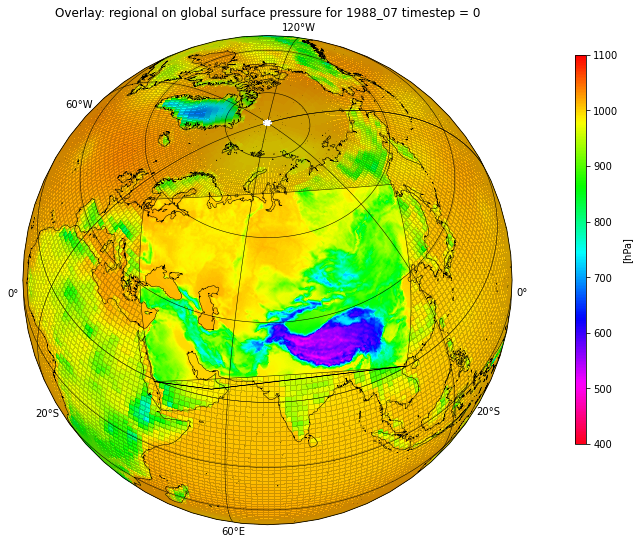

In [2]:
#-- Create the color mesh plot:
fname1 = "caf198807_merged_PS.nc"
#--  open file and read variables
f1    =  xr.open_dataset(fname1)
var1  =  f1.variables["PS"][:]
print(var1.shape)
lat   =  f1.variables["lat"][:]
lon   =  f1.variables["lon"][:]
print(lon.shape)
dlat  =  lat[1]-lat[0]
dlon  =  lon[1]-lon[0]
#-- Add cyclic points:












fname2 = "PS_ts.nc"
f2    = xr.open_dataset(fname2)
var2  = f2.variables["PS"][:]
lat2d = f2.variables["lat"][:,:]
lon2d = f2.variables["lon"][:,:]

nlat  = len(lat2d[:,0])
nlon  = len(lon2d[0,:])
#-- Define edges of regional data:

lon_val_lower = lon2d[0,:]
lon_val_right = lon2d[:,nlon-1]
lon_val_left  = lon2d[:,0]
lon_val_upper = lon2d[nlat-1,:]
lat_val_lower = lat2d[0,:]
lat_val_right = lat2d[:,nlon-1]
lat_val_left  = lat2d[:,0]
lat_val_upper = lat2d[nlat-1,:]

#-- Generate the data for the edges of the regional grid

line_lons = np.append([lon_val_upper], [lon_val_right[::-1]])
line_lons = np.append([line_lons], [lon_val_lower])
line_lons = np.append([line_lons], [lon_val_left])
line_lats = np.append([lat_val_upper], [lat_val_right[::-1]])
line_lats = np.append([line_lats], [lat_val_lower])
line_lats = np.append([line_lats], [lat_val_left])
polyline = np.column_stack([line_lons, line_lats])

#-- Create the color mesh plot:


projection=ccrs.Orthographic(central_latitude=50.0, central_longitude=70.0)

for i in range(1):
    

    fig, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(10,9))
    
    ax.set_global()
    #-- add coastal outlines
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='k', zorder=3)
    gl.xlabel_style = {'size':10}
    gl.ylabel_style = {'size':10}
    gl.top_labels   = True
    gl.right_labels = True
    
    #-- plot the title string
    plt.title('Overlay: regional on global surface pressure for 1988_07 timestep = ' +str(i))
    #-- define color map
    cmap = 'hsv_r'
    #-- create the color mesh plot
    edgecolor = [0.0, 0.0, 0.0, 0.2] #'k'
    linewidth = 0.01
    cyclic_data, cyclic_lon = cutil.add_cyclic_point(var1[i,::2,::2], coord=lon[::2])
    cnf1  = ax.pcolormesh(cyclic_lon, lat[::2], cyclic_data/100,
                          cmap=cmap,
                          vmin=400,
                          vmax=1100,
                          edgecolor=edgecolor,
                          linewidth=linewidth,
                          transform=ccrs.PlateCarree())
    
    cnf2 = ax.pcolormesh(lon2d, lat2d, var2[int(i*2),:,:]/100,
                         cmap=cmap,
                         vmin=400,
                         vmax=1100,
                         transform=ccrs.PlateCarree())
    #-- add a polyline around the regional grid
    lw, ec, fc = .5, 'k', 'none'     #-- linewidth, edgecolor, facecolor
    ax.add_patch(mpatches.Polygon(polyline,
                                  closed=False,
                                  fill=False,
                                  linewidth=lw,
                                  edgecolor=ec,
                                  facecolor=fc,
                                  transform=ccrs.Geodetic()))
    #-- add a color bar
    cbar_ax = fig.add_axes([0.94, 0.25, 0.015, 0.6], autoscalex_on=True)  #-- x,y,w,h
    cbar    = fig.colorbar(cnf1, cax=cbar_ax, orientation='vertical')
    plt.setp(cbar.ax.get_xticklabels()[::2], visible=False)
    cbar.set_label('[hPa]')
    if (i <10 ) & (i<100):
        plt.savefig('figs/dynamical_00'+str(i)+'.png', bbox_inches='tight', dpi=100)
    elif (i>9) & (i<100) :
        plt.savefig('figs/dynamical_0'+str(i)+'.png', bbox_inches='tight', dpi=100)
    else:
        plt.savefig('figs/dynamical_'+str(i)+'.png', bbox_inches='tight', dpi=100)
        
    
    